[[-0.998746 -0.2      -0.942082 ...,  0.510638  1.       -0.765453]
 [-0.998104 -0.1      -0.781525 ..., -0.446809  0.903071 -0.814018]
 [-0.869221 -1.        0.293255 ...,  0.617021  1.       -0.502759]
 ..., 
 [-0.999344  0.6      -0.766862 ..., -0.191489  0.991326 -0.584989]
 [-0.996375 -1.       -0.492669 ...,  0.489362  1.       -0.698124]
 [-0.992475 -1.       -0.492669 ...,  0.489362  1.       -0.757726]]
[ 22.9  37.   23.   11.7  12.1  13.9  23.4  32.2  21.7  19.9  17.8  21.7
  23.6  16.5  18.   16.2  17.5  27.9  22.9  22.8  18.9  23.8  19.4  18.8
  27.   16.8  20.4  14.3  26.6  27.5  11.8  18.5  24.6  25.   15.6  18.2
  20.7  13.1  20.3  21.9  11.9  21.2  16.1  20.8  34.9  18.9  30.8  15.6
  23.7  44.8  14.5  14.6  14.9  23.8  18.7  19.4  20.4  28.   32.   24.7
  18.5  12.6  21.2  16.5  17.1  24.5  17.   19.4  18.6  28.4   8.4  19.9
  26.4  13.8  23.6  27.5  42.8  29.8  20.8  43.5  22.6  29.1  20.1  20.
  50.   24.1  20.3  13.3  50.   29.   50.   14.5  24.8  46.   33.2  17.5
 

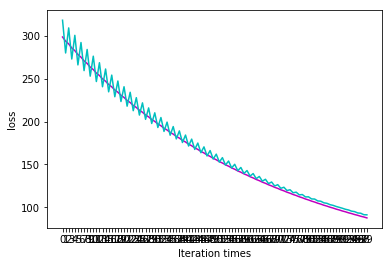

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

alpha = 0.01
iteration = 100
accuracy = 0.001

m = 506
m_train = 203
d_test = 203
feature = 13
theta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

iter_num = [1] * iteration
loss_train = [1] * iteration
loss_test = [1] * iteration

#read Dataset
def get_data():
    data = load_svmlight_file("housing_scale", n_features=13)
    return data[0], data[1]

X, y = get_data()
X = X.toarray()
#divide dataset into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
print(X_train)
print(y_train)

#hypothesis
def hypothesis(x):
    result = theta[0]
    for i in range(0, feature):
        result = result + theta[i + 1] * x[i]
    return result

#lossfunction
def loss(m, X, y):
    sum = 0
    for i in range(0, m):
        sum = sum + (hypothesis(X[i]) - y[i]) ** 2
    sum = sum / (2 * m)
    return sum

#gradient
def gradient(j, m, X, y):
    sum = 0
    if (j == 0):
        for i in range(0, m):
            sum = sum + (hypothesis(X[i]) - y[i])
    else:
        for i in range(0, m):
            sum = sum + (hypothesis(X[i]) - y[i]) * X[i][j - 1]
        sum = sum / m
    return sum

#train regression model
def train():
    for i in range(0, iteration):
        for j in range(0, feature + 1):
            theta[j] = theta[j] - alpha * gradient(j, m_train, X_train, y_train)
        iter_num[i] = i;
        loss_train[i] = loss(m_train, X_train, y_train);
        loss_test[i] = loss(d_test, X_test, y_test);

train()

fig, ax = plt.subplots()
ax.plot(iter_num, loss_train, color='m', label='loss of train')
ax.plot(iter_num, loss_test, color='c', label='loss of test')

ax.set_xlabel('Iteration times')
ax.set_ylabel('loss')
plt.xticks(iter_num, rotation=0)
plt.show()